In [ ]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import altair as alt
from vega_datasets import data
import warnings

In [ ]:
# Creating a new dataset for Manhattan only

arrest = pd.read_csv(r'C:\Program Files\R\NYC_Arrest.csv')
arrest_m = arrest[arrest['ARREST_BORO'] == 'M']

<AxesSubplot:xlabel='crime_per_year'>

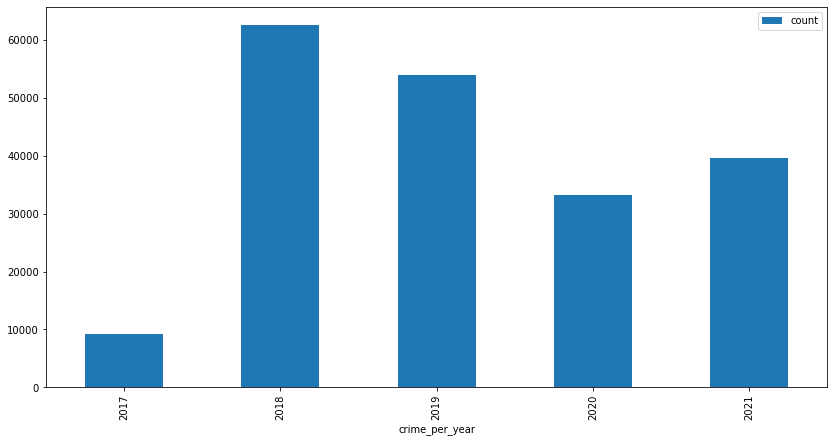

In [ ]:
# Distribution of crime in Manhattan per year
warnings.filterwarnings("ignore")
arrest_m['ARREST_DATE'] = pd.to_datetime(arrest_m['ARREST_DATE'])
arrest_m['crime_per_year'] = arrest_m['ARREST_DATE'].map(lambda dt: dt.strftime('%Y'))
grouped_year = arrest_m.groupby('crime_per_year').size().to_frame("count").reset_index()
grouped_year.plot(kind='bar', x='crime_per_year', y='count', figsize=(14, 7))

In [ ]:
# Defining datasets for before and after Covid

before_covid = arrest_m[(arrest_m['ARREST_DATE'] > "2018-12-31 00:00:00") & (arrest_m['ARREST_DATE'] < "2020-01-01 00:00:00")]
after_covid = arrest_m[(arrest_m['ARREST_DATE'] > "2020-12-31 00:00:00") & (arrest_m['ARREST_DATE'] < "2021-12-31 12:00:00")]

Text(0.5, 0.98, 'Distribution of top-20 crime cases before/after Covid')

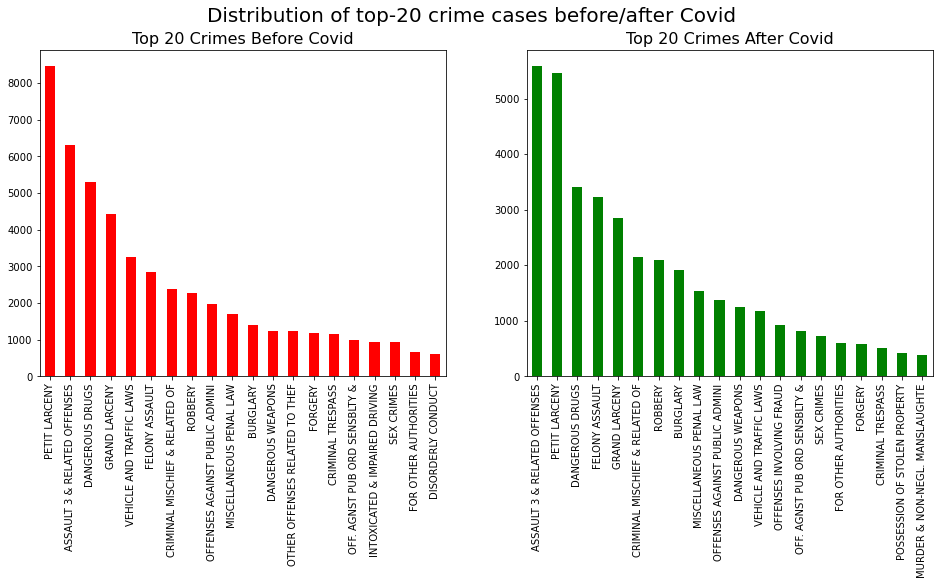

In [ ]:
# Showing the Top-20 crime cases before/after Covid

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6))

ax=before_covid['OFNS_DESC'].value_counts().head(20).plot(kind='bar',color='red', ax=ax1)
fig = ax.get_figure()
ax1.set_title("Top 20 Crimes Before Covid", size= 16);

ax=after_covid['OFNS_DESC'].value_counts().head(20).plot(kind='bar',color='green', ax=ax2)
fig = ax.get_figure()
ax2.set_title("Top 20 Crimes After Covid", size= 16);
fig.suptitle('Distribution of top-20 crime cases before/after Covid', size= 20)

Text(0.5, 0.98, 'Rape and Murder cases before/after Covid')

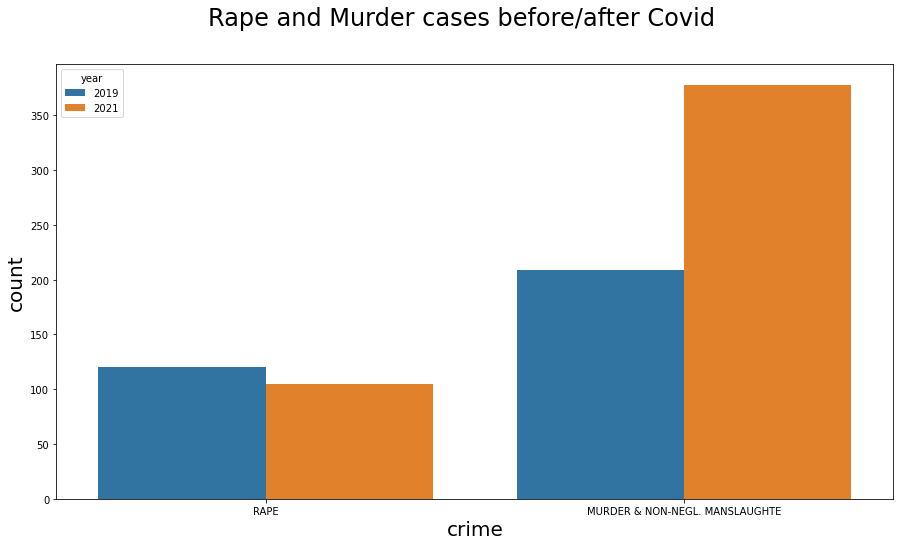

In [ ]:
# Comparing the number of Rape and Murder cases before/after Covid

warnings.filterwarnings("ignore")
violent_crime = ['RAPE', 'MURDER & NON-NEGL. MANSLAUGHTE']
serious_crime = arrest_m.loc[arrest_m['OFNS_DESC'].isin(violent_crime)]
serious_crime['ARREST_DATE'] = pd.to_datetime(serious_crime['ARREST_DATE'])
serious_crime['year'] = serious_crime['ARREST_DATE'].map(lambda dt: dt.strftime('%Y'))
years = ['2019', '2021']
serious_crime=serious_crime[serious_crime['crime_per_year'].isin(years)]

fig, ax = plt.subplots(figsize=(15, 8))

sns.countplot(data=serious_crime, x="OFNS_DESC", hue="year")

fig = ax.get_figure()
ax.set_ylabel("count", size = 20)
ax.set_xlabel("crime", size = 20)
fig.suptitle('Rape and Murder cases before/after Covid', size = 24)